#### Importing Librabries

In [78]:
import pandas as pd
import numpy as np

#Data Visualazation
import matplotlib.pyplot as plt
import seaborn as sns

#Data preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

#For Data spliting 
from sklearn.model_selection import train_test_split

#for ML models 
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#For checking model score 
from sklearn.metrics import r2_score, precision_score, confusion_matrix,accuracy_score

#### Loading Data Set 

In [13]:
data = pd.read_csv(r"G:\Data Scientist\class attachment\12 3rd 4th august\Files\diabetes.csv")

In [15]:
#checking data 
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
# checking Null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
#Chcking for duplicated values 
data.duplicated().sum()

0

In [23]:
# Data Correlation 
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#### EDA (Explotary Data Analysis)

<Axes: xlabel='Outcome', ylabel='Glucose'>

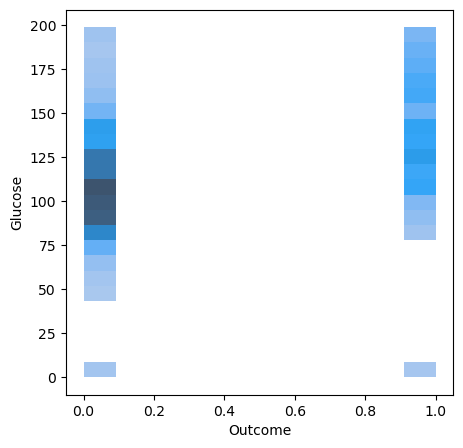

In [30]:
#Histogram
plt.figure(figsize=(5,5))
sns.histplot(x="Outcome", y="Glucose", data = data)


#### ModelBuilding and Slection 

In [35]:
x=data.drop(['Outcome'],axis=1) #independent variables 
y=data['Outcome'] #dependent variables 

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80)

##### DecessionTree

In [40]:
classifier=DecisionTreeClassifier()

In [42]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
y_hat = classifier.predict(x_test)

In [80]:
#R2score 
score = r2_score(y_test,y_hat)
print("r2sore for the model with Decession tree", score)

#precession Score 
pre_score = precision_score(y_test,y_hat)
print("precssion for the model with Decession tree", pre_score)

#confusion Matrix
con_matrix = confusion_matrix(y_test,y_hat)
print(con_matrix)

#accurracy scrore
acc_score = accuracy_score(y_test,y_hat)
print(acc_score)

r2sore for the model with Decession tree -0.23095238095238124
precssion for the model with Decession tree 0.7090909090909091
[[68 16]
 [31 39]]
0.6948051948051948


#### KNN

In [55]:
knn = KNeighborsClassifier(n_neighbors=7)


In [57]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [63]:
y_knn = knn.predict(x_test)

In [82]:
#R2score 
score = r2_score(y_test,y_knn)
print("r2sore for the model with KNN", score)

#precession Score 
pre_score = precision_score(y_test,y_knn)
print("precssion for the model with KNN", pre_score)

#confusion Matrix
con_matrix = confusion_matrix(y_test,y_knn)
print(con_matrix)

#accurracy scrore
acc_score = accuracy_score(y_test,y_knn)
print(acc_score)

r2sore for the model with KNN -0.25714285714285734
precssion for the model with KNN 0.72
[[70 14]
 [34 36]]
0.6883116883116883


#### Logistic Regression

In [70]:
model = LogisticRegression()

In [72]:
model.fit(x_train,y_train)

D:\Anacode\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
y_hat_Lr= model.predict(x_test)

In [84]:
#R2score 
score = r2_score(y_test,y_hat_Lr)
print("r2sore for the model with Logistic Regression", score)

#precession Score 
pre_score = precision_score(y_test,y_hat_Lr)
print("precssion for the model with Logistic Regression", pre_score)

#confusion Matrix
con_matrix = confusion_matrix(y_test,y_hat_Lr)
print(con_matrix)

#accurracy scrore
acc_score = accuracy_score(y_test,y_hat_Lr)
print(acc_score)

r2sore for the model with Logistic Regression -0.07380952380952399
precssion for the model with Logistic Regression 0.8222222222222222
[[76  8]
 [33 37]]
0.7337662337662337


#### Linear Regression

In [89]:
model_1 = LinearRegression()

In [91]:
model_1.fit(x_train,y_train)

LinearRegression()

In [93]:
y_pred=model_1.predict(x_test)

In [101]:
#R2score 
score = r2_score(y_test,y_pred)
print("r2sore for the model with Linear Regression", score)

r2sore for the model with Linear Regression 0.2997440612341431
